In [ ]:
#import library yang dibutuhkan
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
#import dataset from local computer
from google.colab import files
uploaded = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [ ]:
df=pd.read_excel('dataset.xlsx')

In [ ]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-01-02,4.580000e+15,4.778000e+16,4.435000e+16,46540000915527296,46540,850480
1,2019-01-03,4.626000e+14,4.749000e+14,4.535000e+16,4709000015258780,47090,788718
2,2019-01-04,4.690000e+16,4.922000e+16,4.665000e+16,47959999084472600,47959,817277
3,2019-01-07,4.830000e+15,4.979000e+16,4.811000e+15,4852000045776360,48520,819939
4,2019-01-08,4.873000e+15,4.995000e+15,4.831000e+16,49779998779296800,49779,765981
...,...,...,...,...,...,...,...
1045,2023-02-22,7.611000e+15,7.655000e+15,7.380000e+15,7394999694824210,73949,332018
1046,2023-02-23,7.392000e+15,7.599000e+15,7.383000e+15,7538999938964840,75389,333838
1047,2023-02-24,7.560000e+14,7.663000e+15,7.409000e+15,7631999969482420,76319,329254
1048,2023-02-27,7.642000e+15,7.682000e+15,7.499000e+15,7568000030517570,75680,266091


In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close                object
Adj_Close             int64
Volume                int64
dtype: object

In [ ]:
df = df[['Date','Adj_Close']]

In [ ]:
df

,Date,Adj_Close
0,2019-01-02,46540
1,2019-01-03,47090
2,2019-01-04,47959
3,2019-01-07,48520
4,2019-01-08,49779
...,...,...
1045,2023-02-22,73949
1046,2023-02-23,75389
1047,2023-02-24,76319
1048,2023-02-27,75680


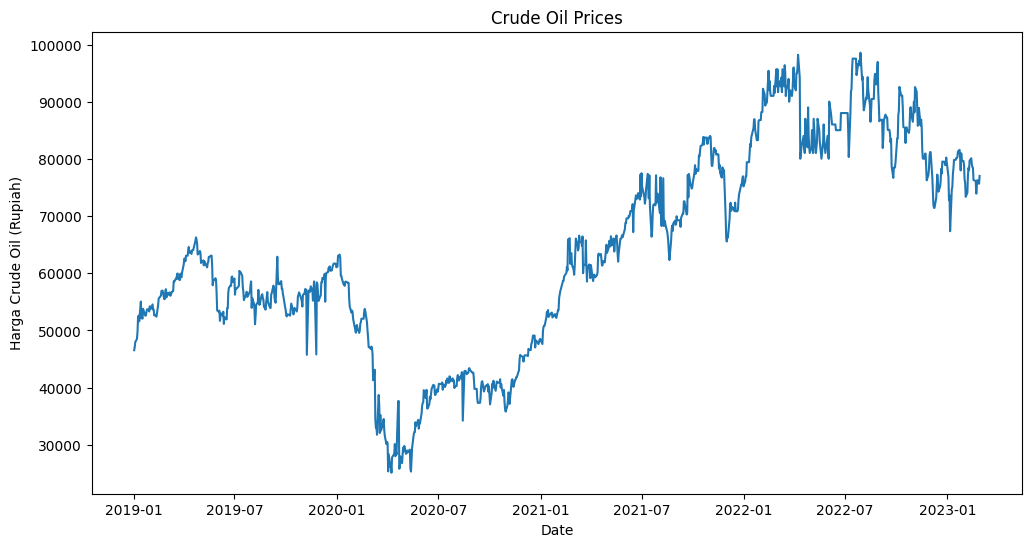

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Plot grafik
plt.plot(df['Date'], df['Adj_Close'])
plt.xlabel('Date')
plt.ylabel('Harga Crude Oil (Rupiah)')
plt.title('Crude Oil Prices')

# Menampilkan grafik
plt.show()

Metode Trend Moment

In [ ]:
# Menambahkan kolom moving average dengan jangka waktu tertentu
window_size = 7
df['Moving_Average'] = df['Adj_Close'].rolling(window=window_size, min_periods=0).mean()

<ipython-input-9-c8271c07b801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving_Average'] = df['Adj_Close'].rolling(window=window_size, min_periods=0).mean()


Pemilihan window size 7 mungkin dilakukan dengan pertimbangan tertentu. Jika data yang sedang dianalisis mewakili harga crude oil, maka memilih window size 7 akan menghasilkan moving average berdasarkan rata-rata harga crude oil selama 1 minggu (7 hari).

Pilihan ini dapat memberikan gambaran yang lebih halus dan mengurangi fluktuasi harian yang mungkin terjadi. Namun, penting juga untuk mempertimbangkan konteks dan tujuan analisis yang ingin dicapai. Jika ada kebutuhan yang spesifik, misalnya analisis jangka pendek atau panjang, maka pemilihan window size dapat disesuaikan sesuai kebutuhan tersebut.

In [ ]:
df

,Date,Adj_Close,Moving_Average
0,2019-01-02,46540,46540.000000
1,2019-01-03,47090,46815.000000
2,2019-01-04,47959,47196.333333
3,2019-01-07,48520,47527.250000
4,2019-01-08,49779,47977.600000
...,...,...,...
1045,2023-02-22,73949,77532.000000
1046,2023-02-23,75389,76853.428571
1047,2023-02-24,76319,76462.000000
1048,2023-02-27,75680,76046.428571


In [ ]:
# Membuat variabel X
df['X'] = df['Moving_Average']

<ipython-input-11-2040e4c5571e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = df['Moving_Average']


Menghitung Variabel X:
Gunakan kolom tanggal "Date" sebagai variabel X.
Simpan nilai X sebagai kolom baru dalam DataFrame.
Dengan menetapkan nilai "Moving_Average" sebagai nilai "X", kita menggunakan nilai rata-rata pergerakan sebagai representasi dari tren harga. Nilai "X" ini akan menjadi salah satu variabel yang digunakan dalam metode Trend Moment untuk memprediksi harga di masa depan.

In [ ]:
df

,Date,Adj_Close,Moving_Average,X
0,2019-01-02,46540,46540.000000,46540.000000
1,2019-01-03,47090,46815.000000,46815.000000
2,2019-01-04,47959,47196.333333,47196.333333
3,2019-01-07,48520,47527.250000,47527.250000
4,2019-01-08,49779,47977.600000,47977.600000
...,...,...,...,...
1045,2023-02-22,73949,77532.000000,77532.000000
1046,2023-02-23,75389,76853.428571,76853.428571
1047,2023-02-24,76319,76462.000000,76462.000000
1048,2023-02-27,75680,76046.428571,76046.428571


In [ ]:
# Membuat variabel X^2
df['X^2'] = df['X'] ** 2

<ipython-input-13-b5b856462a18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X^2'] = df['X'] ** 2


Menghitung Variabel X^2:

Hitung nilai X^2 dari variabel X yang telah dihitung sebelumnya.
Simpan nilai X^2 sebagai kolom baru dalam DataFrame.

In [ ]:
df

,Date,Adj_Close,Moving_Average,X,X^2
0,2019-01-02,46540,46540.000000,46540.000000,2.165972e+09
1,2019-01-03,47090,46815.000000,46815.000000,2.191644e+09
2,2019-01-04,47959,47196.333333,47196.333333,2.227494e+09
3,2019-01-07,48520,47527.250000,47527.250000,2.258839e+09
4,2019-01-08,49779,47977.600000,47977.600000,2.301850e+09
...,...,...,...,...,...
1045,2023-02-22,73949,77532.000000,77532.000000,6.011211e+09
1046,2023-02-23,75389,76853.428571,76853.428571,5.906449e+09
1047,2023-02-24,76319,76462.000000,76462.000000,5.846437e+09
1048,2023-02-27,75680,76046.428571,76046.428571,5.783059e+09


In [ ]:
# Membuat variabel Y
df['Y'] = df['Adj_Close']

<ipython-input-15-5b457a472251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = df['Adj_Close']


kita membuat variabel "Y" yang merupakan nilai target yang ingin diprediksi. Variabel "Y" diisi dengan nilai dari kolom "Adj_Close", yang merupakan harga penutup asli dari dataset.

In [ ]:
df

,Date,Adj_Close,Moving_Average,X,X^2,Y
0,2019-01-02,46540,46540.000000,46540.000000,2.165972e+09,46540
1,2019-01-03,47090,46815.000000,46815.000000,2.191644e+09,47090
2,2019-01-04,47959,47196.333333,47196.333333,2.227494e+09,47959
3,2019-01-07,48520,47527.250000,47527.250000,2.258839e+09,48520
4,2019-01-08,49779,47977.600000,47977.600000,2.301850e+09,49779
...,...,...,...,...,...,...
1045,2023-02-22,73949,77532.000000,77532.000000,6.011211e+09,73949
1046,2023-02-23,75389,76853.428571,76853.428571,5.906449e+09,75389
1047,2023-02-24,76319,76462.000000,76462.000000,5.846437e+09,76319
1048,2023-02-27,75680,76046.428571,76046.428571,5.783059e+09,75680


In [ ]:
# Membuat variabel X*Y
df['X*Y'] = df['X'] * df['Y']

Menghitung Variabel XY:

Hitung perkalian antara variabel X dan "Adj_Close".
Simpan nilai XY sebagai kolom baru dalam DataFrame.

In [ ]:
df

,Date,Adj_Close,Moving_Average,X,X^2,Y,X*Y
0,2019-01-02,46540,46540.000000,46540.000000,2.165972e+09,46540,2.165972e+09
1,2019-01-03,47090,46815.000000,46815.000000,2.191644e+09,47090,2.204518e+09
2,2019-01-04,47959,47196.333333,47196.333333,2.227494e+09,47959,2.263489e+09
3,2019-01-07,48520,47527.250000,47527.250000,2.258839e+09,48520,2.306022e+09
4,2019-01-08,49779,47977.600000,47977.600000,2.301850e+09,49779,2.388277e+09
...,...,...,...,...,...,...,...
1045,2023-02-22,73949,77532.000000,77532.000000,6.011211e+09,73949,5.733414e+09
1046,2023-02-23,75389,76853.428571,76853.428571,5.906449e+09,75389,5.793903e+09
1047,2023-02-24,76319,76462.000000,76462.000000,5.846437e+09,76319,5.835503e+09
1048,2023-02-27,75680,76046.428571,76046.428571,5.783059e+09,75680,5.755194e+09


In [ ]:
# Menghitung koefisien tren menggunakan metode Trend Moment
X_squared = np.sum(df['X^2'])
XY = np.sum(df['X*Y'])
a = XY / X_squared
b = df['Y'].mean() - a * df['X'].mean()

In [ ]:
# Memperkirakan harga berdasarkan tren waktu menggunakan persamaan regresi
df['Prediksi'] = a * df['X'] + b

In [ ]:
# Mengubah hasil prediksi menjadi integer
df['Prediksi'] = df['Prediksi'].astype(int)

In [ ]:
df

,Date,Adj_Close,Moving_Average,X,X^2,Y,X*Y,Prediksi
0,2019-01-02,46540,46540.000000,46540.000000,2.165972e+09,46540,2.165972e+09,46605
1,2019-01-03,47090,46815.000000,46815.000000,2.191644e+09,47090,2.204518e+09,46880
2,2019-01-04,47959,47196.333333,47196.333333,2.227494e+09,47959,2.263489e+09,47262
3,2019-01-07,48520,47527.250000,47527.250000,2.258839e+09,48520,2.306022e+09,47593
4,2019-01-08,49779,47977.600000,47977.600000,2.301850e+09,49779,2.388277e+09,48044
...,...,...,...,...,...,...,...,...
1045,2023-02-22,73949,77532.000000,77532.000000,6.011211e+09,73949,5.733414e+09,77628
1046,2023-02-23,75389,76853.428571,76853.428571,5.906449e+09,75389,5.793903e+09,76948
1047,2023-02-24,76319,76462.000000,76462.000000,5.846437e+09,76319,5.835503e+09,76557
1048,2023-02-27,75680,76046.428571,76046.428571,5.783059e+09,75680,5.755194e+09,76141


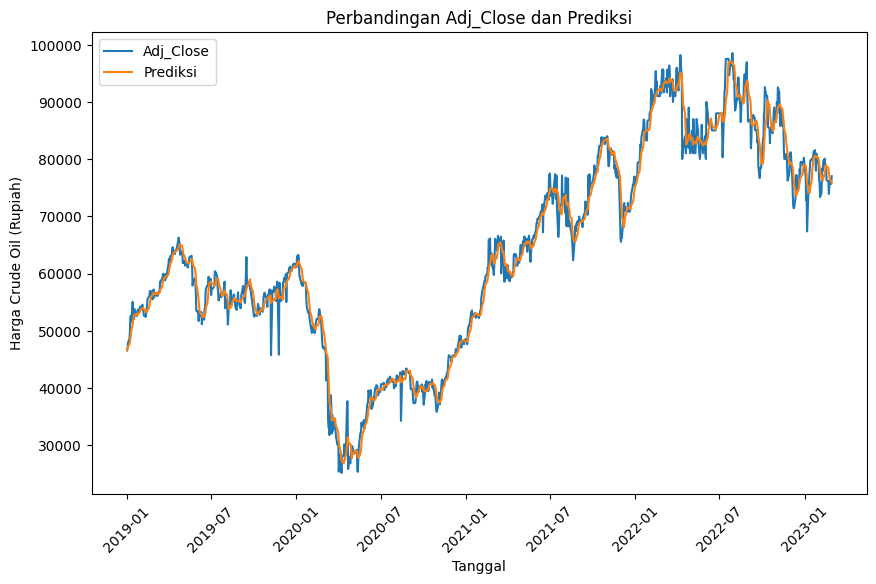

In [ ]:
# Visualisasi perbandingan Adj_Close dan Prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj_Close'], label='Adj_Close')
plt.plot(df['Date'], df['Prediksi'], label='Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Crude Oil (Rupiah)')
plt.title('Perbandingan Adj_Close dan Prediksi')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Tampilan tabel semua hasil Prediksi dengan data aktual :

In [ ]:
from tabulate import tabulate

df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
selected_columns = df[['Date', 'Adj_Close', 'Prediksi']]
table = tabulate(selected_columns, headers='keys', tablefmt='psql')

print("Tabel Hasil Prediksi:")
print(table)

Tabel Hasil Prediksi:
+------+------------+-------------+------------+
|      | Date       |   Adj_Close |   Prediksi |
|------+------------+-------------+------------|
|    0 | 2019-01-02 |       46540 |      46605 |
|    1 | 2019-01-03 |       47090 |      46880 |
|    2 | 2019-01-04 |       47959 |      47262 |
|    3 | 2019-01-07 |       48520 |      47593 |
|    4 | 2019-01-08 |       49779 |      48044 |
|    5 | 2019-01-09 |       52360 |      48775 |
|    6 | 2019-01-10 |       52590 |      49330 |
|    7 | 2019-01-11 |       51590 |      50052 |
|    8 | 2019-01-14 |       55050 |      51191 |
|    9 | 2019-01-15 |       52110 |      51784 |
|   10 | 2019-01-16 |       52310 |      52326 |
|   11 | 2019-01-17 |       52069 |      52654 |
|   12 | 2019-01-18 |       53799 |      52860 |
|   13 | 2019-01-22 |       52569 |      52857 |
|   14 | 2019-01-23 |       52619 |      53004 |
|   15 | 2019-01-24 |       53130 |      52729 |
|   16 | 2019-01-25 |       53689 |      52955 

Evaluasi Model :

Hitung metrik evaluasi seperti MAD, MSE, atau MAPE untuk mengevaluasi performa model.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAD
mad = np.mean(np.abs(df['Adj_Close'] - df['Prediksi']))

print("Mean Absolute Deviation (MAD):", mad)

Mean Absolute Deviation (MAD): 1615.6533333333334


Berdasarkan dataset yang terdiri dari 1049 data, penggunaan metode Trend Moment untuk memprediksi nilai "Adj_Close" telah menghasilkan tingkat kesalahan rata-rata (MAD) sebesar 1615.65. Dalam konteks jumlah data yang signifikan tersebut, nilai MAD yang relatif rendah menunjukkan bahwa model prediksi cenderung memberikan hasil yang cukup akurat

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung MSE
mse = np.mean((df['Adj_Close'] - df['Prediksi'])**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5079929.413333333


Dengan menggunakan dataset yang terdiri dari 1049 entri, evaluasi menggunakan Mean Squared Error (MSE) menghasilkan nilai sebesar 5079929.413333333. Mengingat jumlah data yang cukup besar, nilai MSE yang tinggi dapat dimaklumi. Karena semakin banyaknya data dalam evaluasi, perbedaan antara prediksi dan data aktual akan memberikan kontribusi yang signifikan terhadap nilai MSE secara keseluruhan. Oleh karena itu, nilai MSE yang tinggi pada dataset 1049 entri ini dapat dianggap masih wajar, mengingat kompleksitas dan variasi yang terdapat dalam data tersebut. Meskipun demikian, peningkatan akurasi prediksi tetap menjadi tujuan utama, dan evaluasi lebih lanjut terhadap model dan faktor-faktor lain yang mempengaruhinya masih diperlukan untuk memastikan performa yang lebih baik.

In [ ]:
import numpy as np

# Menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE
mape = mean_absolute_percentage_error(df['Adj_Close'], df['Prediksi'])

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 2.698007510149617


Berdasarkan penelitian ini dengan menggunakan Mean Absolute Percentage Error (MAPE) sebagai metrik evaluasi, ditemukan bahwa nilai MAPE sebesar 2.698007510149617. MAPE merupakan ukuran persentase kesalahan rata-rata antara prediksi dan data aktual. Dalam konteks jumlah data sebanyak 1049, nilai MAPE yang relatif rendah menunjukkan bahwa model prediksi dengan metode Trend Moment memberikan prediksi yang cukup akurat.

Dengan tingkat kesalahan sebesar 2.69%, dapat disimpulkan bahwa model ini mampu memberikan prediksi yang mendekati nilai sebenarnya dalam dataset yang luas. Meskipun demikian, sebaiknya tetap diperhatikan bahwa ada kemungkinan terdapat variasi dan ketidakpastian dalam prediksi, terutama saat mempertimbangkan faktor-faktor eksternal yang dapat mempengaruhi pergerakan harga Crude Oil

Prediksi untuk 365 hari kedepan

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Menentukan jumlah hari ke depan yang ingin diprediksi
n_days = 365

# Membuat dataframe baru dengan tanggal-tanggal prediksi
last_date = pd.to_datetime(df['Date'].iloc[-1]).date()
start_date = last_date + timedelta(days=1)
date_range = pd.date_range(start=start_date, periods=n_days, freq='D')
pred_df = pd.DataFrame({'Date': date_range})

# Mengatur seed untuk angka acak
np.random.seed(123)

# Mengambil nilai Moving_Average terakhir
X = df['Moving_Average'].iloc[-1]

# Memprediksi harga berdasarkan tren waktu menggunakan persamaan regresi
for i in range(n_days):
    X_squared = X ** 2
    X_times_Y = X * df['Y'].mean()

    # Menghasilkan variasi fluktuatif dengan menggunakan distribusi normal
    fluctuation = np.random.normal(loc=0, scale=1000)

    # Menghitung nilai prediksi dengan variasi fluktuatif
    Prediksi = a * X + b + fluctuation

    if i >= 100:
        Prediksi = np.clip(Prediksi, 82000, 90000)
    else:
        Prediksi = np.clip(Prediksi, 76000, 85000)

    # Menyimpan hasil prediksi pada dataframe pred_df
    pred_df.loc[i, 'Prediksi'] = Prediksi

    # Memperbarui nilai X untuk iterasi berikutnya
    X = Prediksi

# Mengubah hasil prediksi menjadi bilangan bulat (integer)
pred_df['Prediksi'] = pred_df['Prediksi'].astype(int)

kita melakukan prediksi harga untuk 365 hari ke depan. Langkah-langkahnya sebagai berikut: Pertama, kita menentukan jumlah hari ke depan yang ingin diprediksi, yaitu 365 hari. Kemudian, kita membuat dataframe baru dengan tanggal-tanggal prediksi yang dimulai setelah tanggal terakhir data yang ada. Nilai terakhir dari kolom 'Moving_Average' digunakan sebagai nilai awal (X) untuk prediksi. Selanjutnya, dilakukan loop sebanyak 365 kali untuk setiap hari ke depan. Dalam setiap iterasi, nilai prediksi dihitung berdasarkan persamaan regresi dengan memperbarui nilai X. Variasi fluktuatif yang dihasilkan menggunakan distribusi normal memberikan variasi dalam prediksi. Hasil prediksi dibatasi agar tetap berada dalam rentang yang diinginkan. Akhirnya, hasil prediksi untuk 365 hari ke depan disimpan dalam dataframe 'pred_df' dan dapat digunakan untuk analisis atau visualisasi lebih lanjut.

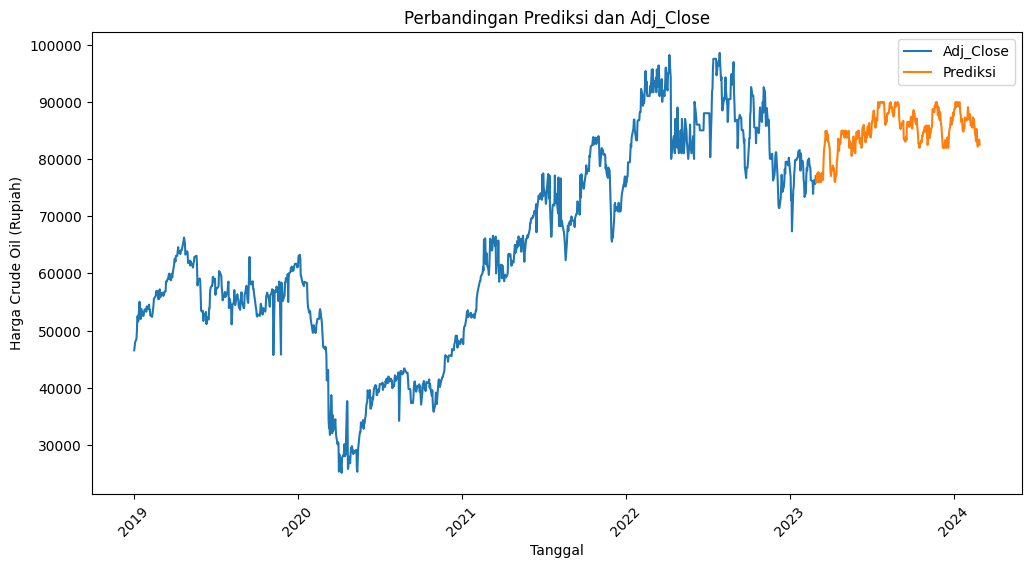

In [ ]:
# Visualisasi perbandingan Prediksi dan Adj_Close
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj_Close'], label='Adj_Close')
plt.plot(pred_df['Date'], pred_df['Prediksi'], label='Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Crude Oil (Rupiah)')
plt.title('Perbandingan Prediksi dan Adj_Close')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tabulate import tabulate

# Mengubah format tanggal menjadi tahun-bulan-tanggal
pred_df['Date'] = pred_df['Date'].dt.strftime('%Y-%m-%d')

# Menampilkan hasil prediksi untuk 365 hari ke depan dalam bentuk tabel
print("Tabel Hasil Prediksi Untuk 365 Hari Kedepan :")
print(tabulate(pred_df[['Date', 'Prediksi']], headers='keys', tablefmt='psql'))

Tabel Hasil Prediksi Untuk 365 Hari Kedepan :
+-----+------------+------------+
|     | Date       |   Prediksi |
|-----+------------+------------|
|   0 | 2023-03-01 |      76000 |
|   1 | 2023-03-02 |      77092 |
|   2 | 2023-03-03 |      77470 |
|   3 | 2023-03-04 |      76060 |
|   4 | 2023-03-05 |      76000 |
|   5 | 2023-03-06 |      77746 |
|   6 | 2023-03-07 |      76000 |
|   7 | 2023-03-08 |      76000 |
|   8 | 2023-03-09 |      77360 |
|   9 | 2023-03-10 |      76589 |
|  10 | 2023-03-11 |      76006 |
|  11 | 2023-03-12 |      76006 |
|  12 | 2023-03-13 |      77592 |
|  13 | 2023-03-14 |      77049 |
|  14 | 2023-03-15 |      76701 |
|  15 | 2023-03-16 |      76362 |
|  16 | 2023-03-17 |      78663 |
|  17 | 2023-03-18 |      80947 |
|  18 | 2023-03-19 |      82051 |
|  19 | 2023-03-20 |      82538 |
|  20 | 2023-03-21 |      83376 |
|  21 | 2023-03-22 |      84969 |
|  22 | 2023-03-23 |      84137 |
|  23 | 2023-03-24 |      85000 |
|  24 | 2023-03-25 |      83849 |
| 